<a href="https://www.kaggle.com/code/ziadhamadafathy/using-randomforest-gbc-and-voting?scriptVersionId=105983520" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

# Import Libraries

In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.impute import SimpleImputer
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer, make_column_selector
import category_encoders as ce
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import confusion_matrix
import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


# Preparing data

In [2]:
df_train = pd.read_csv('../input/titanic/train.csv')
df_test = pd.read_csv('../input/titanic/test.csv')

In [3]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [4]:
print('Shape of train data: ', df_train.shape)
print('Shape of test data: ', df_test.shape)

Shape of train data:  (891, 12)
Shape of test data:  (418, 11)


In [5]:
X = df_train.drop(columns=['Survived'])
y = df_train['Survived']

In [6]:
df = pd.concat([X, df_test], axis=0)
df

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [7]:
df.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [8]:
df.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,1309.000000,1309.000000,1046.000000,1309.000000,1309.000000,1308.000000
mean,655.000000,2.294882,29.881138,0.498854,0.385027,33.295479
std,378.020061,0.837836,14.413493,1.041658,0.865560,51.758668
min,1.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,328.000000,2.000000,21.000000,0.000000,0.000000,7.895800
50%,655.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,982.000000,3.000000,39.000000,1.000000,0.000000,31.275000
max,1309.000000,3.000000,80.000000,8.000000,9.000000,512.329200


In [9]:
df.dtypes

PassengerId      int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [10]:
df.drop(columns=['PassengerId','Cabin'], inplace=True)

In [11]:
cleaner = KNNImputer(n_neighbors=10, weights="distance")
numerical = ['Age']
df[numerical] = cleaner.fit_transform(df[numerical])

In [12]:
df['Embarked'].fillna(method ='ffill', inplace=True)
df['Fare'].fillna(method ='ffill', inplace=True)

In [13]:
df.isnull().sum()

Pclass      0
Name        0
Sex         0
Age         0
SibSp       0
Parch       0
Ticket      0
Fare        0
Embarked    0
dtype: int64

In [14]:
df['Title'] = df['Name'].str.extract(r'([A-Za-z]+)\.', expand=False)

In [15]:
df.drop(columns=['Name'], inplace=True)

In [16]:
df['Title'].value_counts()

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64

In [17]:
categorical = df.select_dtypes(include = "object").columns

for i in range(0, len(categorical)):
    print(df[categorical[i]].value_counts())
    print('****************************************\n')

male      843
female    466
Name: Sex, dtype: int64
****************************************

CA. 2343        11
CA 2144          8
1601             8
PC 17608         7
S.O.C. 14879     7
                ..
113792           1
36209            1
323592           1
315089           1
359309           1
Name: Ticket, Length: 929, dtype: int64
****************************************

S    914
C    271
Q    124
Name: Embarked, dtype: int64
****************************************

Mr          757
Miss        260
Mrs         197
Master       61
Rev           8
Dr            8
Col           4
Mlle          2
Major         2
Ms            2
Lady          1
Sir           1
Mme           1
Don           1
Capt          1
Countess      1
Jonkheer      1
Dona          1
Name: Title, dtype: int64
****************************************



In [18]:
hotencoder1=ce.OneHotEncoder(cols='Sex',handle_unknown='return_nan',return_df=True,use_cat_names=True)
dfSex = hotencoder1.fit_transform(df['Sex'])

hotencoder2=ce.OneHotEncoder(cols='Embarked',handle_unknown='return_nan',return_df=True,use_cat_names=True)
dfEmbarked = hotencoder2.fit_transform(df['Embarked'])

In [19]:
encoder = LabelEncoder()
df['Ticket'] = encoder.fit_transform(df['Ticket'].astype(str))
df['Title'] = encoder.fit_transform(df['Title'].astype(str))

In [20]:
df = pd.concat([df, dfSex, dfEmbarked], axis=1)

In [21]:
df

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Title,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q
0,3,male,22.000000,1,0,720,7.2500,S,13,1.0,0.0,1.0,0.0,0.0
1,1,female,38.000000,1,0,816,71.2833,C,14,0.0,1.0,0.0,1.0,0.0
2,3,female,26.000000,0,0,914,7.9250,S,10,0.0,1.0,1.0,0.0,0.0
3,1,female,35.000000,1,0,65,53.1000,S,14,0.0,1.0,1.0,0.0,0.0
4,3,male,35.000000,0,0,649,8.0500,S,13,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,male,29.881138,0,0,711,8.0500,S,13,1.0,0.0,1.0,0.0,0.0
414,1,female,39.000000,0,0,834,108.9000,C,4,0.0,1.0,0.0,1.0,0.0
415,3,male,38.500000,0,0,872,7.2500,S,13,1.0,0.0,1.0,0.0,0.0
416,3,male,29.881138,0,0,579,8.0500,S,13,1.0,0.0,1.0,0.0,0.0


In [22]:
df.drop(columns=['Sex', 'Embarked'], inplace=True)

In [23]:
df

,Pclass,Age,SibSp,Parch,Ticket,Fare,Title,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q
0,3,22.000000,1,0,720,7.2500,13,1.0,0.0,1.0,0.0,0.0
1,1,38.000000,1,0,816,71.2833,14,0.0,1.0,0.0,1.0,0.0
2,3,26.000000,0,0,914,7.9250,10,0.0,1.0,1.0,0.0,0.0
3,1,35.000000,1,0,65,53.1000,14,0.0,1.0,1.0,0.0,0.0
4,3,35.000000,0,0,649,8.0500,13,1.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,29.881138,0,0,711,8.0500,13,1.0,0.0,1.0,0.0,0.0
414,1,39.000000,0,0,834,108.9000,4,0.0,1.0,0.0,1.0,0.0
415,3,38.500000,0,0,872,7.2500,13,1.0,0.0,1.0,0.0,0.0
416,3,29.881138,0,0,579,8.0500,13,1.0,0.0,1.0,0.0,0.0


In [24]:
X = df.iloc[:891, :]
df_test = df.iloc[891:, :]

In [25]:
df_test

,Pclass,Age,SibSp,Parch,Ticket,Fare,Title,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q
0,3,34.500000,0,0,376,7.8292,13,1.0,0.0,0.0,0.0,1.0
1,3,47.000000,1,0,582,7.0000,14,0.0,1.0,1.0,0.0,0.0
2,2,62.000000,0,0,184,9.6875,13,1.0,0.0,0.0,0.0,1.0
3,3,27.000000,0,0,366,8.6625,13,1.0,0.0,1.0,0.0,0.0
4,3,22.000000,1,1,338,12.2875,14,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,29.881138,0,0,711,8.0500,13,1.0,0.0,1.0,0.0,0.0
414,1,39.000000,0,0,834,108.9000,4,0.0,1.0,0.0,1.0,0.0
415,3,38.500000,0,0,872,7.2500,13,1.0,0.0,1.0,0.0,0.0
416,3,29.881138,0,0,579,8.0500,13,1.0,0.0,1.0,0.0,0.0


In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75,random_state=33, shuffle=True)

In [27]:
RandomForestClassifierModel = RandomForestClassifier(criterion = 'entropy', max_depth=9, n_estimators=600, random_state=33)
RandomForestClassifierModel.fit(X_train, y_train)
print('RandomForestClassifierModel Train Score is : ' , RandomForestClassifierModel.score(X_train, y_train))
print('RandomForestClassifierModel Test Score is : ' , RandomForestClassifierModel.score(X_test, y_test))

RandomForestClassifierModel Train Score is :  0.9431137724550899
RandomForestClassifierModel Test Score is :  0.874439461883408


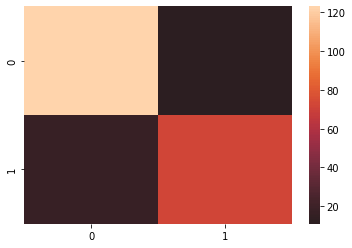

Confusion Matrix is
 [[123  11]
 [ 17  72]]


In [28]:
y_pred_rf = RandomForestClassifierModel.predict(X_test)
CM_rf = confusion_matrix(y_test, y_pred_rf)
sns.heatmap(CM_rf, center=True)
plt.show()
print('Confusion Matrix is\n', CM_rf)

In [29]:
GBCModel = GradientBoostingClassifier(n_estimators=150,max_depth=3,random_state=44) 
GBCModel.fit(X_train, y_train)
print('GBCModel Train Score is : ' , GBCModel.score(X_train, y_train))
print('GBCModel Test Score is : ' , GBCModel.score(X_test, y_test))

GBCModel Train Score is :  0.9341317365269461
GBCModel Test Score is :  0.874439461883408


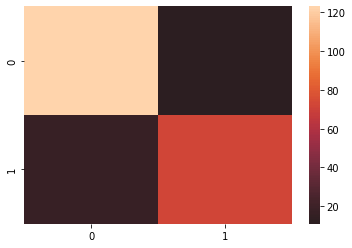

Confusion Matrix is
 [[123  11]
 [ 17  72]]


In [30]:
y_pred_gb = GBCModel.predict(X_test)
CM_gb = confusion_matrix(y_test, y_pred_gb)
sns.heatmap(CM_gb, center=True)
plt.show()
print('Confusion Matrix is\n', CM_gb)

In [31]:
VotingClassifierModel = VotingClassifier(estimators=[('RFModel',RandomForestClassifierModel),
                                                     ('GBCModel',GBCModel)],
                                         voting='hard')
VotingClassifierModel.fit(X_train, y_train)
print('VotingClassifierModel Train Score is : ' , VotingClassifierModel.score(X_train, y_train))
print('VotingClassifierModel Test Score is : ' , VotingClassifierModel.score(X_test, y_test))

VotingClassifierModel Train Score is :  0.937125748502994
VotingClassifierModel Test Score is :  0.874439461883408


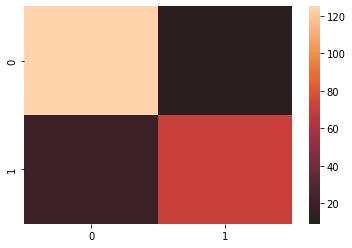

Confusion Matrix is
 [[125   9]
 [ 19  70]]


In [32]:
y_pred_v = VotingClassifierModel.predict(X_test)
CM_v = confusion_matrix(y_test, y_pred_v)
sns.heatmap(CM_v, center=True)
plt.show()
print('Confusion Matrix is\n', CM_v)

# Submission

In [33]:
df_test

,Pclass,Age,SibSp,Parch,Ticket,Fare,Title,Sex_male,Sex_female,Embarked_S,Embarked_C,Embarked_Q
0,3,34.500000,0,0,376,7.8292,13,1.0,0.0,0.0,0.0,1.0
1,3,47.000000,1,0,582,7.0000,14,0.0,1.0,1.0,0.0,0.0
2,2,62.000000,0,0,184,9.6875,13,1.0,0.0,0.0,0.0,1.0
3,3,27.000000,0,0,366,8.6625,13,1.0,0.0,1.0,0.0,0.0
4,3,22.000000,1,1,338,12.2875,14,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
413,3,29.881138,0,0,711,8.0500,13,1.0,0.0,1.0,0.0,0.0
414,1,39.000000,0,0,834,108.9000,4,0.0,1.0,0.0,1.0,0.0
415,3,38.500000,0,0,872,7.2500,13,1.0,0.0,1.0,0.0,0.0
416,3,29.881138,0,0,579,8.0500,13,1.0,0.0,1.0,0.0,0.0


In [34]:
X_ = df_test.iloc[:]
y_pred_rf = RandomForestClassifierModel.predict(X_)
y_pred_v = VotingClassifierModel.predict(X_)
y_pred_gb = GBCModel.predict(X_)

In [35]:
test = pd.read_csv('../input/titanic/test.csv')

In [36]:
submission = test[["PassengerId"]]
submission["Survived"] = y_pred_rf
submission

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
...,...,...
413,1305,0
414,1306,1
415,1307,0
416,1308,0


In [37]:
submission.to_csv('my_output_rf_titanic.csv', index=False)
submission.to_csv('my_output_v_titanic.csv', index=False)
submission.to_csv('my_output_gb_titanic.csv', index=False)